# Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing the Data for ML 

In [77]:
data = pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/hou_all_miss.csv')
data.head()

,Town_Id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
0,T15,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,T14,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,T11,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,T12,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,T14,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [78]:
data=data.drop(['Town_Id'],axis=1)

# Defining Independent and Target Feature

In [79]:
X=data.drop(['Medv'],axis=1)
Y=data[['Medv']]

# Check for Missing Values

In [41]:
X.isnull().mean()

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.000000
NOX        0.000000
RM         0.005929
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
dtype: float64

In [42]:
Y.isnull().mean()

Medv    0.0
dtype: float64

# Split the data into Numeric and Categorical Features

In [43]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [44]:
#Since all features are Numerical, we will not create dataframe with Categorical values and proceed with the dataframe X itself

# Encode the Categorical Features

In [45]:
# Not to be performed since Categorical Features are absent

# Build the complete feature set

In [46]:
# We will proceed with the X features as of now

# Imputation of Missing Values

In [80]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_1=pd.DataFrame(imputer.fit_transform(X),index=X.index,columns=X.columns)

In [48]:
X_1.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

# Capping and Flooring of Outliers

In [81]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [82]:
X_1=X_1.apply(lambda x : outlier_cap(x))

In [51]:
# checking if the outlier_cap function has worked correctly or not
X.describe(percentiles=[0.01,0.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285867,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704507,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
1%,0.013610,0.000000,1.253500,0.000000,0.398000,4.521180,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
99%,41.370330,90.000000,25.650000,1.000000,0.871000,8.336200,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [52]:
# Now apply describe function on the capped dataframe and check the Maximum and the Minimum values. They should ideally correspond
# to the values of 99% and 1% percentile points in the original dataframe
X_1.describe(percentiles=[0.01,0.99])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375175,11.304348,11.118875,0.069170,0.554770,6.288339,68.584506,3.778529,9.549407,407.794466,18.454743,356.715751,12.642073
std,6.908970,23.112644,6.809112,0.253994,0.115773,0.678659,28.127163,2.052652,8.707259,167.791388,2.154109,91.133441,7.074084
min,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
1%,0.013620,0.000000,1.256825,0.000000,0.398000,4.529627,6.619500,1.210473,1.000000,188.000000,13.000000,6.777500,2.885850
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
99%,41.219403,90.000000,25.650000,1.000000,0.871000,8.333100,100.000000,9.222646,24.000000,666.000000,21.200000,396.900000,33.822075
max,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500


In [53]:
X_1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

# Feature Selection usign KBinsDiscretizer

In [116]:
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
X_binned=pd.DataFrame(Bins.fit_transform(X_1),index=X_1.index, columns=X_1.columns).add_suffix('_Bin')
X_binned.describe()

C:\Anaconda_Python\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Anaconda_Python\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Anaconda_Python\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Anaconda_Python\lib\site-packages\sklearn\preprocessing\_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


,CRIM_Bin,ZN_Bin,INDUS_Bin,CHAS_Bin,NOX_Bin,RM_Bin,AGE_Bin,DIS_Bin,RAD_Bin,TAX_Bin,PTRATIO_Bin,B_Bin,LSTAT_Bin,linreg_pred_prices_Bin
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.003953,0.241107,2.183794,0.0,2.017787,2.003953,2.007905,2.003953,1.458498,1.847826,2.219368,1.802372,2.005929,2.003953
std,1.417006,0.428178,1.580768,0.0,1.416200,1.417006,1.421175,1.417006,0.757312,1.166600,1.578726,1.167410,1.419093,1.417006
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,0.000000,2.000000,0.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,4.000000,0.0,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000
max,4.000000,1.000000,4.000000,0.0,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000


In [117]:
# Join the Binnned Dataframe with the dependent variable(target)
X_binned=pd.concat([X_binned,Y],axis=1,join="inner")
X_binned.head()

,CRIM_Bin,ZN_Bin,INDUS_Bin,CHAS_Bin,NOX_Bin,RM_Bin,AGE_Bin,DIS_Bin,RAD_Bin,TAX_Bin,PTRATIO_Bin,B_Bin,LSTAT_Bin,linreg_pred_prices_Bin,Medv
0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0,4.0,24.0
1,0.0,0.0,1.0,0.0,1.0,3.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,3.0,21.6
2,0.0,0.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0,2.0,0.0,4.0,34.7
3,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0,2.0,3.0,0.0,3.0,33.4
4,1.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,0.0,0.0,2.0,3.0,0.0,3.0,36.2


C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


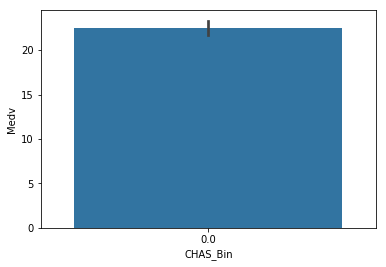

In [118]:
ax=sns.barplot(x='CHAS_Bin',y='Medv',data=X_binned,estimator=np.mean)

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


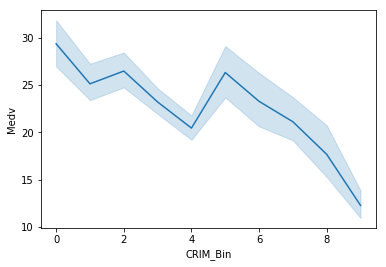

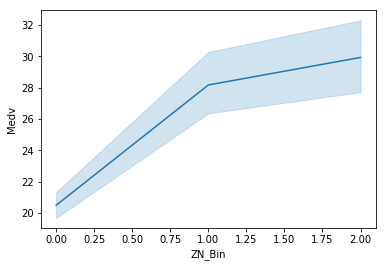

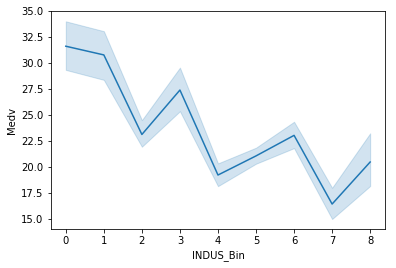

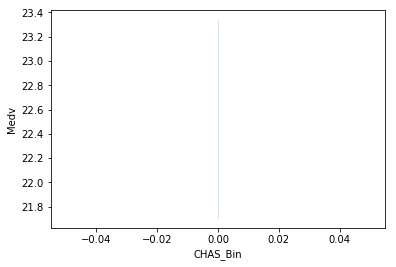

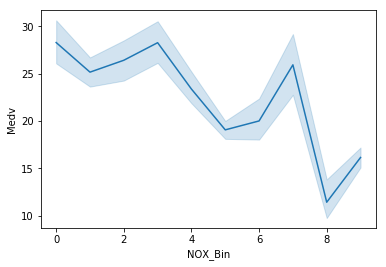

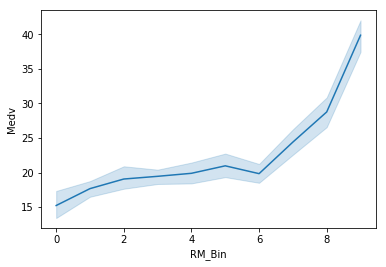

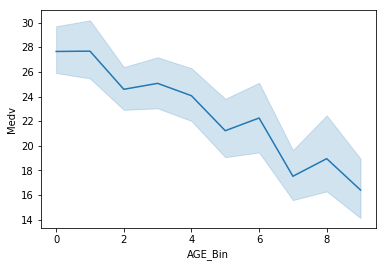

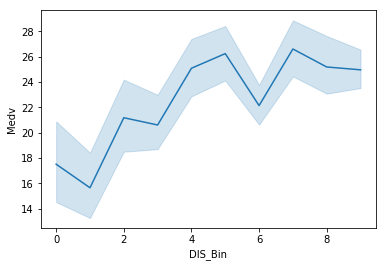

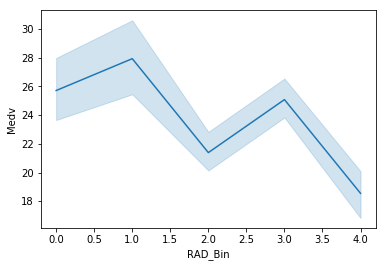

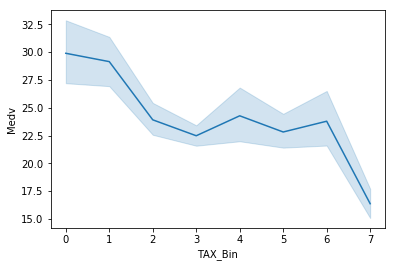

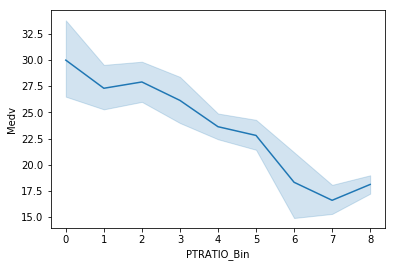

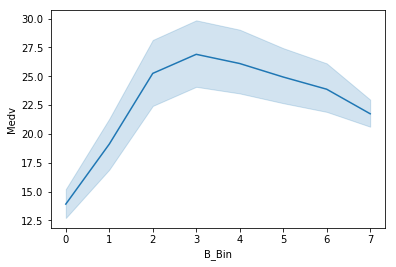

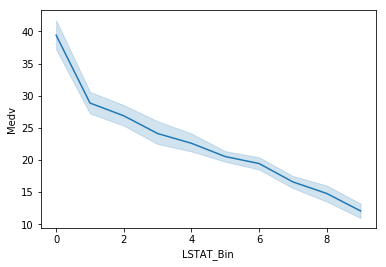

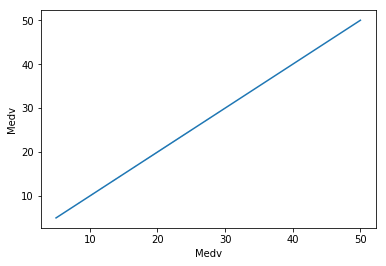

In [92]:
import matplotlib.pyplot as plt
from numpy import mean
for col in (X_binned.columns):
    plt.figure()
    ax=sns.lineplot(x=col,y='Medv',data=X_binned,estimator=mean)
    plt.show()

In [108]:
X_all=X_1.drop(['CHAS'],axis=1)

In [124]:
data.groupby('CHAS')['Medv'].mean()

CHAS
0    22.093843
1    28.440000
Name: Medv, dtype: float64

# Splitting the data into Train and Test Sets

In [96]:
X_all.shape

(506, 11)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_all,Y,test_size=0.3,random_state=42)

In [98]:
# If 2 samples are truly random, then the sample means are ideally very close to each other
y_train.mean()
# random_state=10 : 21.97

Medv    23.015819
dtype: float64

In [99]:
y_test.mean()
# random_state=10 : 23.8

Medv    21.407895
dtype: float64

In [58]:
type(y_train)

pandas.core.frame.DataFrame

# Fitting the Multiple Regression Model

In [110]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [101]:
linreg.intercept_

array([36.8129371])

In [61]:
linreg.coef_[0].shape

(13,)

In [111]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(linreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,CRIM,0.017112
1,ZN,0.000162
2,INDUS,0.014480
3,NOX,0.043589
4,RM,0.359031
5,AGE,-0.003135
6,DIS,-0.043076
7,RAD,0.020201
8,TAX,0.000366
9,PTRATIO,-0.052115


# Evaluating the Model

# 1. R Square Metric Between Training and Testing Sets

In [115]:
linreg_pred_train=linreg.predict(X_train)
linreg_pred_test=linreg.predict(X_test)
linreg_pred_all=linreg.predict(X_all)
X_all['linreg_pred_prices']=pd.DataFrame(linreg_pred_all, index=X_all.index)

from sklearn.metrics import r2_score
r_sq_train=r2_score(linreg_pred_train,y_train)
r_sq_train

In [113]:
from sklearn.metrics import r2_score
r_sq_train=r2_score(linreg_pred_train,y_train)
r_sq_train
#0.6325105856730827

0.6514166139625002

In [114]:
from sklearn.metrics import r2_score
r_sq_test=r2_score(linreg_pred_test,y_test)
r_sq_test

0.6865871119803412

# 2. MSE Between Training and Testing Sets

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mse_train=mean_squared_error(linreg_pred_train,y_train)
mse_train

22.11005575291511

In [68]:
mse_test=mean_squared_error(linreg_pred_test,y_test)
mse_test

20.963571570291812

# Visualizing the Model Performance 

# 1. Join the Actuals with the Predicted

In [69]:
data_eval=pd.concat([X_1,Y],axis=1,join='inner')
data_eval.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,linreg_pred_prices,Medv
0,0.01361,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.040371,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,24.809484,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,31.092097,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,29.020447,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.297582,36.2


# 2. Create Ranks on Predicted Values

In [120]:
data_eval['Medv_rank']=pd.qcut(data_eval['Medv'].rank(method='first').values,50,duplicates='drop').codes+1
data_eval.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,linreg_pred_prices,Medv,Medv_rank
0,0.01361,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,30.040371,24.0,35
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,24.809484,21.6,27
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,31.092097,34.7,45
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,29.020447,33.4,45
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.297582,36.2,46


In [71]:
# 3. Plot the Actuals versus Predicted across those buckets
# You will try to see how close are the AVERAGE PREDICTED VALUES to the AVERAGE ACTUAL VALUES

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


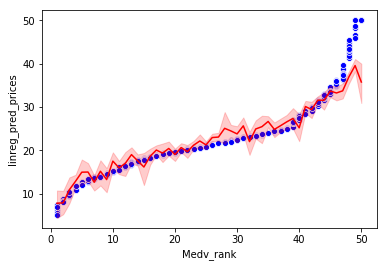

In [121]:
ax = sns.scatterplot( x="Medv_rank", y="Medv", data=data_eval,color='Blue')
ax = sns.lineplot( x="Medv_rank", y="linreg_pred_prices", data=data_eval, color='Red')